In [47]:

#https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
import pandas as pd

from flask import Flask, render_template, jsonify

In [2]:
stock_name="AMZN"
numResults=200
url ="https://www.google.com/search?q=stock+symbol+"+stock_name+"&tbm=nws&hl=en&num="+str(numResults)
# https://www.google.com/search?q=AMZN&tbm=nws&hl=en&num=150

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>stock symbol AMZN - Google Search</title><script nonce="2Oc2gRPzXrB8Aj3Bx1dkMQ==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goog
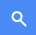
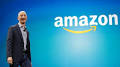
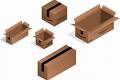
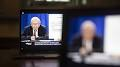
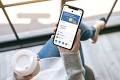
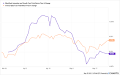
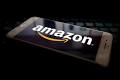
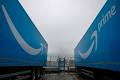
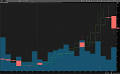
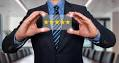
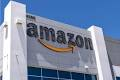
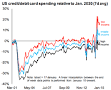
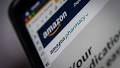
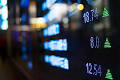
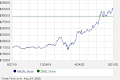
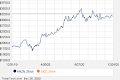
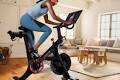
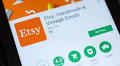
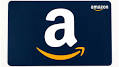
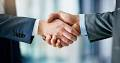
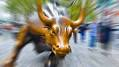
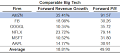
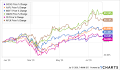
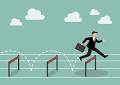
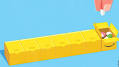
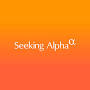
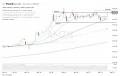
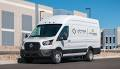
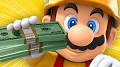
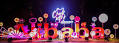
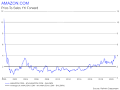
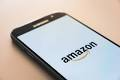

In [4]:
print(soup)

In [5]:
# Get the headline text
results = soup.find_all("div", attrs = {"class": "ZINbbc"})
headlines = []
for result in results:
    try:
        headline = result.find("div", attrs={"class":"vvjwJb"}).get_text()
        if headline != "": 
            headlines.append(headline)
    except:
        continue
# flattens string
text_h = "".join(headlines)

In [6]:
# Get the preview text
results = soup.find_all("div", attrs = {"class": "ZINbbc"})
descriptions = []
for result in results:
    try:
        description = result.find("div", attrs={"class":"s3v9rd"}).get_text()
        if description != "": 
            # remove the "1 day ago" etc.
            description = description[description.find("·")+1:]
            descriptions.append(description)
    except:
        continue
# flattens string
text_p = "".join(descriptions)

In [7]:
text = text_h + text_p
text

'Amazon Stock: Is The MGM Acquisition A Financial Burden?Amazon signs deal to buy legendary Hollywood studio MGM for $8.45 billionNotable Thursday Option Activity: AMZN, LQDT, CMGWill Amazon see stock split under new CEO?Could An Amazon Split Foreshadow Dow Jones Industrial Inclusion?Nasdaq\'s computer system literally can\'t handle Berkshire Hathaway\'s sky-high stock priceESGU, AAPL, MSFT, AMZN: Large Inflows Detected at ETFIs It Too Late to Get In on This Millionaire-Maker Stock?This New Fund Could Upend the CEF World. Here\'s What You Need to KnowThe Amazon.com (NASDAQ:AMZN) Share Price Is Up 427% And Shareholders Are DelightedWhy Amazon Is a Stock to Buy and Hold ForeverAmazon stock price target raised to $4,000 at BofAAmazon stock may be 70% undervalued and the company worth $3 trillion: analystIf You Had Bought Amazon.com (NASDAQ:AMZN) Stock Five Years Ago, You Could Pocket A 434% Gain TodayAmazon: More Fuel for the BullsChewy (CHWY) Vs Amazon (AMZN): Which E-Commerce Stock Is A

In [8]:
sp = spacy.load('en_core_web_sm')
doc = sp(text)

In [9]:
# for debugging to check words
for word in doc:
    print(word.text, word.pos_, word.dep_)

Amazon PROPN compound
Stock PROPN nsubj
: PUNCT punct
Is AUX ROOT
The DET det
MGM PROPN compound
Acquisition PROPN nmod
A PROPN det
Financial PROPN compound
Burden?Amazon PROPN compound
signs NOUN nsubj
deal VERB ccomp
to PART aux
buy VERB xcomp
legendary ADJ amod
Hollywood PROPN compound
studio NOUN dobj
MGM PROPN npadvmod
for ADP prep
$ SYM nmod
8.45 NUM nummod
billionNotable ADJ amod
Thursday PROPN compound
Option PROPN compound
Activity NOUN pobj
: PUNCT punct
AMZN PROPN appos
, PUNCT punct
LQDT PROPN npadvmod
, PUNCT punct
CMGWill PROPN compound
Amazon PROPN nsubj
see VERB ccomp
stock NOUN nsubj
split VERB ccomp
under ADP prep
new ADJ amod
CEO?Could NOUN pobj
An DET det
Amazon PROPN compound
Split PROPN compound
Foreshadow PROPN compound
Dow PROPN compound
Jones PROPN compound
Industrial PROPN compound
Inclusion?Nasdaq PROPN poss
's PART case
computer NOUN compound
system NOUN nsubj
literally ADV advmod
ca AUX aux
n't PART neg
handle VERB ROOT
Berkshire PROPN compound
Hathaway PRO

Stock PROPN compound
Trades PROPN ROOT
for ADP prep
Friday PROPN pobj
: PUNCT punct
Ethereum PROPN appos
, PUNCT punct
AMZN PROPN appos
, PUNCT punct
PYPL PROPN npadvmod
, PUNCT punct
FSLYDow PROPN compound
Jones PROPN compound
Futures PROPN conj
: PUNCT punct
Market PROPN compound
Rally PROPN appos
Revs PROPN dep
Up ADV prt
, PUNCT punct
Four NUM nummod
Stocks NOUN compound
Break PROPN nsubj
Out ADP prt
... PUNCT punct
Is AUX ccomp
Now ADV advmod
The DET det
Time NOUN attr
To PART aux
Buy VERB relcl
Stock PROPN dobj
In ADP prep
Nike PROPN pobj
, PUNCT punct
Nokia PROPN conj
, PUNCT punct
Facebook PROPN conj
, PUNCT punct
Amazon PROPN conj
Or CCONJ cc
Disney?Amazon PROPN conj
Has VERB advcl
a DET det
2021 NUM nummod
Growth PROPN compound
Driver PROPN dobj
Going VERB acl
Under ADP prep
the DET det
Radar PROPN pobj
, PUNCT punct
Says VERB ROOT
AnalystBetter PROPN compound
Buy PROPN nsubj
: PUNCT punct
Amazon PROPN appos
vs. ADP prep
ChewyAmazon PROPN pobj
Stock PROPN compound
Edges PROPN

GOOGL PROPN appos
) PUNCT punct
saw VERB ROOT
options NOUN compound
trading NOUN compound
volume NOUN dobj
of ADP prep
55,060 NUM nummod
contracts NOUN pobj
, PUNCT punct
representing VERB advcl
approximately ADV advmod
5.5 NUM compound
million NUM nummod
underlying VERB amod
shares NOUN dobj
or CCONJ cc
... PUNCT punct
The DET det
shares NOUN nsubjpass
are AUX auxpass
priced VERB ROOT
at ADP prep
$ SYM nmod
2.94 NUM pobj
with ADP prep
a DET det
$ SYM nmod
7.50 NUM nummod
average ADJ amod
price NOUN compound
target NOUN pobj
that DET nsubj
suggests VERB relcl
an DET det
upside NOUN dobj
of ADP prep
155 NUM nummod
% NOUN pobj
in ADP prep
the DET det
coming ADJ amod
year NOUN pobj
. PUNCT punct
( PUNCT punct
See VERB ROOT
SESN PROPN npadvmod
stock NOUN compound
analysis NOUN dobj
... PUNCT punct
Amazon PROPN nsubj
( PUNCT punct
AMZN PROPN appos
) PUNCT punct
will AUX aux
expand VERB ROOT
its PRON poss
virtual ADJ amod
health NOUN compound
care NOUN compound
pilot NOUN compound
program NO

services NOUN dobj
, PUNCT punct
the DET det
potential NOUN nsubj
is AUX ROOT
enormous ADJ acomp
for ADP prep
fueling VERB pcomp
its PRON poss
growth NOUN dobj
... PUNCT punct
On ADP prep
the DET det
other ADJ amod
hand NOUN pobj
, PUNCT punct
if SCONJ mark
they PRON nsubj
miss VERB advcl
, PUNCT punct
the DET det
stock NOUN nsubj
may AUX aux
move VERB ROOT
lower ADV advmod
. PUNCT punct
While SCONJ mark
the DET det
sustainability NOUN ROOT
of ADP prep
the DET det
immediate ADJ amod
price NOUN compound
change NOUN pobj
and CCONJ cc
future ADJ amod
earnings NOUN conj
... PUNCT punct
Amazon PROPN compound
shares NOUN nsubj
are AUX ROOT
up ADV advmod
0.6 NUM nummod
% NOUN npadvmod
pre ADJ dep
- NOUN attr
market NOUN attr
to ADP prep
$ SYM nmod
3,285 NUM pobj
. PUNCT punct
Yesterday NOUN npadvmod
, PUNCT punct
Amazon PROPN compound
shares NOUN nsubj
surged VERB ROOT
after ADP mark
the DET det
company NOUN nsubj
offered VERB advcl
President PROPN compound
Biden PROPN compound
assistance NOU

In [59]:
sp = spacy.load('en_core_web_sm')
doc = sp(text)
newText_dict = {}
for word in doc:
    if word.pos_ in ["ADJ","PROPN","INTJ","ADV"]:
        if word.text.lower() in list(newText_dict.keys()):
            newText_dict[word.text.lower()]["Counts"]=newText_dict[word.text.lower()]["Counts"]+1
        else:
            newText_dict[word.text.lower()]={"Words":word.text.lower(),
                                            "POS": word.pos_,
                                            "Counts": 1}

In [64]:
newText_dict.values()

dict_values([{'Words': 'amazon', 'POS': 'PROPN', 'Counts': 91}, {'Words': 'stock', 'POS': 'PROPN', 'Counts': 53}, {'Words': 'mgm', 'POS': 'PROPN', 'Counts': 4}, {'Words': 'acquisition', 'POS': 'PROPN', 'Counts': 3}, {'Words': 'a', 'POS': 'PROPN', 'Counts': 2}, {'Words': 'financial', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'burden?amazon', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'legendary', 'POS': 'ADJ', 'Counts': 1}, {'Words': 'hollywood', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'billionnotable', 'POS': 'ADJ', 'Counts': 1}, {'Words': 'thursday', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'option', 'POS': 'PROPN', 'Counts': 5}, {'Words': 'amzn', 'POS': 'PROPN', 'Counts': 61}, {'Words': 'lqdt', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'cmgwill', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'new', 'POS': 'ADJ', 'Counts': 7}, {'Words': 'split', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'foreshadow', 'POS': 'PROPN', 'Counts': 1}, {'Words': 'dow', 'POS': 'PROPN', 'Counts': 2}, {'Words': 'jones', 'POS'

In [65]:
jsonify(list(newText_dict.values()))

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in some way. To solve
this, set up an application context with app.app_context().  See the
documentation for more information.

In [40]:
Text_df = pd.DataFrame(newText)
Text_df = pd.DataFrame(Text_df[0].value_counts().reset_index().values, columns=["Words", "Counts"])
Text_df["POS"] = [nlp(word).pos_ for word in Text_df.Words.tolist()] 
Text_df
# return Text_df.to_dict(orient="records")

NameError: name 'nlp' is not defined

In [31]:
type(word.pos_)

str